In [1]:
# Import dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
# Note: You can only unzip a zipped tuple once before it is removed from the computer's memory. 
# Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

coordinates = list(lat_lngs)
coordinates

[(-11.010316628128876, 151.7192134191344),
 (-17.310782159865354, 133.38339642008623),
 (-61.496858273590234, 32.38577999380988),
 (-7.097679611231328, 140.49139982344764),
 (75.37449269847468, 0.04313482073482078),
 (-16.19988762516708, -14.910137890203657),
 (31.893405565396876, 22.949014620500208),
 (-49.07342085778283, 178.13802796424295),
 (-43.077542449603826, 126.29687526064436),
 (-35.46030553574056, 51.81975705951274),
 (-63.9548687096291, -71.16395250332087),
 (-44.69829374874671, 150.15023762058473),
 (65.88905604147993, -159.01923302952028),
 (-68.83119889110297, 119.60839368073891),
 (-1.620302932020337, -148.55340633111126),
 (66.29882658607076, -56.894380352642244),
 (-84.16603886658808, 67.58990627773713),
 (10.692319405443001, -117.01040709707058),
 (-49.14559714997968, -162.78946839646696),
 (68.27574612392752, -107.11732855164571),
 (68.04779663221987, -116.6788831924076),
 (65.81911234372808, 160.85624136637563),
 (-59.422042462158544, -74.82382325248544),
 (72.5878

In [4]:
from citipy import citipy
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
     # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

605

In [5]:
import requests
import time
from datetime import datetime
api_key = "26e27adb85e630b46b1b3b676bdb887d"

url = "https://api.openweathermap.org/data/2.5/weather?lat=35&lon=139&appid="+api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities with try and except, they should be within the for loop.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                  "Lat": city_lat,
                  "Lng": city_lng,
                  "Max Temp": city_max_temp,
                  "Humidity": city_humidity,
                  "Cloudiness": city_clouds,
                  "Wind Speed": city_wind,
                  "Country": city_country,
                  "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | samarai
Processing Record 2 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | kiunga
Processing Record 5 of Set 1 | roald
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | darnah
Processing Record 8 of Set 1 | christchurch
Processing Record 9 of Set 1 | esperance
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | sisimiut
Processing Record 17 of Set 1 | cabo san lucas
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | cherskiy
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | nome
Processing Record 23 of Set 1 | chuy
Processing 

Processing Record 41 of Set 4 | saint marys
Processing Record 42 of Set 4 | yantai
Processing Record 43 of Set 4 | chimore
Processing Record 44 of Set 4 | vagur
Processing Record 45 of Set 4 | luba
Processing Record 46 of Set 4 | kruisfontein
Processing Record 47 of Set 4 | lianzhou
Processing Record 48 of Set 4 | port hardy
Processing Record 49 of Set 4 | aksu
Processing Record 50 of Set 4 | saint-philippe
Processing Record 1 of Set 5 | keetmanshoop
Processing Record 2 of Set 5 | amderma
City not found. Skipping...
Processing Record 3 of Set 5 | thinadhoo
Processing Record 4 of Set 5 | kaitangata
Processing Record 5 of Set 5 | sahuaripa
Processing Record 6 of Set 5 | chippewa falls
Processing Record 7 of Set 5 | new norfolk
Processing Record 8 of Set 5 | broome
Processing Record 9 of Set 5 | nouakchott
Processing Record 10 of Set 5 | houston
Processing Record 11 of Set 5 | hambantota
Processing Record 12 of Set 5 | haines junction
Processing Record 13 of Set 5 | chagda
City not found.

Processing Record 28 of Set 8 | pochutla
Processing Record 29 of Set 8 | ayagoz
Processing Record 30 of Set 8 | bugyi
Processing Record 31 of Set 8 | usevya
Processing Record 32 of Set 8 | krasnoselkup
Processing Record 33 of Set 8 | juneau
Processing Record 34 of Set 8 | yantongshan
Processing Record 35 of Set 8 | lazeshchyna
Processing Record 36 of Set 8 | yerbogachen
Processing Record 37 of Set 8 | drayton valley
Processing Record 38 of Set 8 | wahiawa
Processing Record 39 of Set 8 | tabarqah
City not found. Skipping...
Processing Record 40 of Set 8 | agen
Processing Record 41 of Set 8 | kensington
Processing Record 42 of Set 8 | brigantine
Processing Record 43 of Set 8 | ponca city
Processing Record 44 of Set 8 | maputo
Processing Record 45 of Set 8 | kandrian
Processing Record 46 of Set 8 | gladstone
Processing Record 47 of Set 8 | belushya guba
City not found. Skipping...
Processing Record 48 of Set 8 | jerantut
Processing Record 49 of Set 8 | nizhneyansk
City not found. Skipping

Processing Record 14 of Set 12 | paamiut
Processing Record 15 of Set 12 | cananea
Processing Record 16 of Set 12 | mayumba
Processing Record 17 of Set 12 | preobrazheniye
Processing Record 18 of Set 12 | rocha
Processing Record 19 of Set 12 | arman
Processing Record 20 of Set 12 | el tigre
Processing Record 21 of Set 12 | aflu
City not found. Skipping...
Processing Record 22 of Set 12 | peniche
Processing Record 23 of Set 12 | chihuahua
Processing Record 24 of Set 12 | rybachiy
Processing Record 25 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 26 of Set 12 | warqla
City not found. Skipping...
Processing Record 27 of Set 12 | riohacha
Processing Record 28 of Set 12 | gazli
Processing Record 29 of Set 12 | khormuj
City not found. Skipping...
Processing Record 30 of Set 12 | maghama
City not found. Skipping...
Processing Record 31 of Set 12 | haverfordwest
Processing Record 32 of Set 12 | iberia
Processing Record 33 of Set 12 | lukovetskiy
Processing Record 34 of Set

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Samarai,-10.6167,150.6667,300.26,78,100,5.49,PG,2022-04-01 22:52:02
1,Port Elizabeth,-33.9180,25.5701,291.31,78,75,6.17,ZA,2022-04-01 22:52:02
2,Kiunga,-6.1219,141.2906,297.25,95,100,0.96,PG,2022-04-01 22:52:03
3,Roald,62.5833,6.1333,276.23,70,75,3.09,NO,2022-04-01 22:52:03
4,Georgetown,5.4112,100.3354,299.11,93,20,1.03,MY,2022-04-01 22:47:04
5,Darnah,32.7670,22.6367,289.49,58,10,2.97,LY,2022-04-01 22:52:04
6,Christchurch,-43.5333,172.6333,292.27,77,20,3.09,NZ,2022-04-01 22:52:04
7,Esperance,-33.8667,121.9000,289.06,70,9,6.58,AU,2022-04-01 22:49:46
8,Ushuaia,-54.8000,-68.3000,278.96,70,20,7.72,AR,2022-04-01 22:47:06
9,Hobart,-42.8794,147.3294,287.18,90,75,4.63,AU,2022-04-01 22:49:26


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Samarai,PG,2022-04-01 22:52:02,-10.6167,150.6667,300.26,78,100,5.49
1,Port Elizabeth,ZA,2022-04-01 22:52:02,-33.9180,25.5701,291.31,78,75,6.17
2,Kiunga,PG,2022-04-01 22:52:03,-6.1219,141.2906,297.25,95,100,0.96
3,Roald,NO,2022-04-01 22:52:03,62.5833,6.1333,276.23,70,75,3.09
4,Georgetown,MY,2022-04-01 22:47:04,5.4112,100.3354,299.11,93,20,1.03
...,...,...,...,...,...,...,...,...,...
540,Ostrovnoy,RU,2022-04-01 23:07:23,68.0531,39.5131,261.66,94,86,4.55
541,Teguldet,RU,2022-04-01 23:07:23,57.3064,88.1667,273.48,97,100,4.83
542,Yagoua,CM,2022-04-01 23:07:23,10.3411,15.2329,303.64,11,60,2.97
543,Aktas,KZ,2022-04-01 23:07:24,49.7789,72.9608,269.01,99,99,1.31


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# # Export the city_data into csv. 
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [12]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.time()
today

1648854444.594327

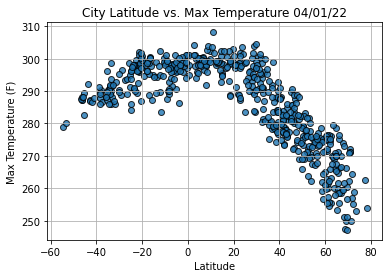

In [13]:
# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           max_temps,
           edgecolor="k", lw=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

plt.show()

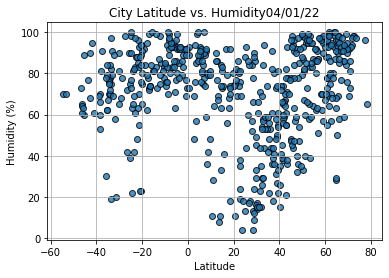

In [14]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
           humidity,
           edgecolor="k", lw=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties. 

plt.title(f"City Latitude vs. Humidity" + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")

plt.show()

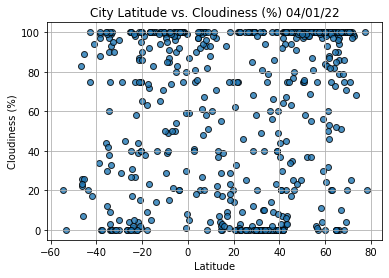

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="k", lw=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")

plt.show()


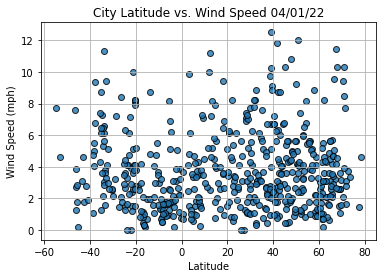

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="k", lw=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("weather_data/Fig4.png")

plt.show()

In [17]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [18]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

# Perform linear regression.
(slope, intercept, r_value, p_value, st_err) = linregress(lats, temps)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [19]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

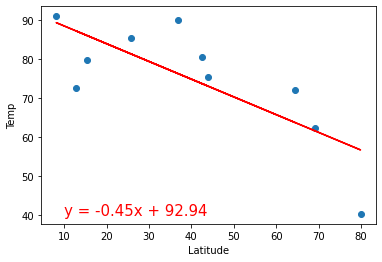

In [20]:
# Import Matplotlib.
import matplotlib.pyplot as plt

# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [31]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

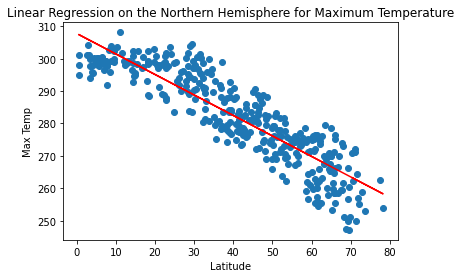

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp', (40, 10))

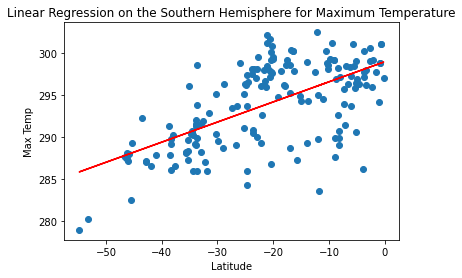

In [54]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for Maximum Temperature", 
                       "Max Temp",(-50,10))

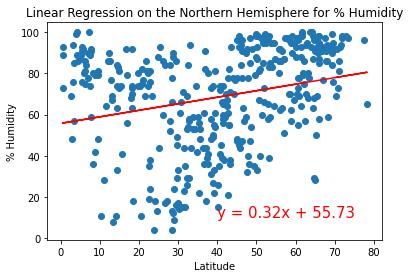

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for % Humidity",
                      "% Humidity", (40, 10))

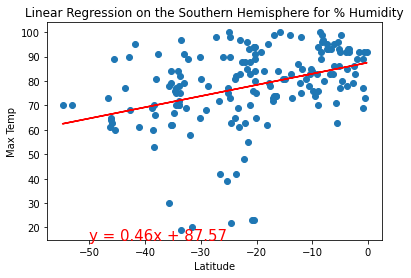

In [52]:
# Linear regression on the Southern Hemisphere humidity.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for % Humidity", 
                       "Max Temp",(-50,15))

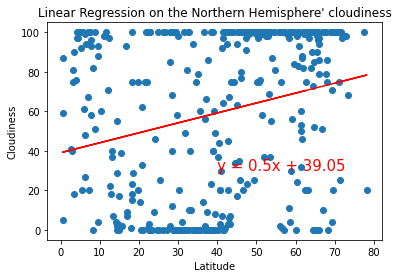

In [59]:
# Cloudiness of Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere % cloudiness",
                      "Cloudiness", (40, 30))

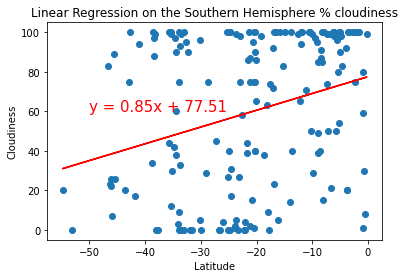

In [60]:
# Cloudiness of Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere % cloudiness",
                      "Cloudiness", (-50, 60))

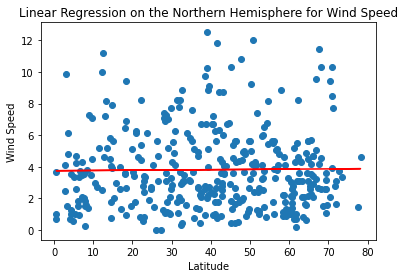

In [67]:
# Linear regression on the Northern Hemisphere wind speed.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for Wind Speed",
                       "Wind Speed", (40, 20))

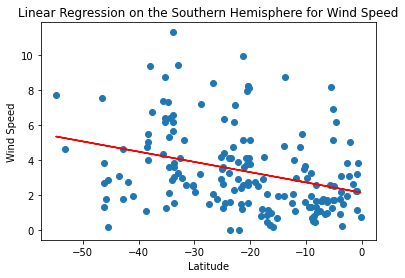

In [68]:
# Southern Hemisphere wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for Wind Speed",
                       "Wind Speed", (-50, 35))